In [1]:
import os
import matplotlib.pyplot
import yaml
from rubin_calib_etc import RubinCalibETC

In [2]:
config_file = os.path.join('config','cbp_calib_etc.yaml')

In [3]:
with open(config_file) as f:
    config = yaml.safe_load(f)
    print(config)

{'light_source': 'laser', 'calib_type': 'CBP', 'snr': 300, 'laser_power_file': 'PGD151_NT242.txt', 'laser_decrease_expected': 0, 'sphere_diameter': 6, 'use_fiber': True, 'fiber_length': 8, 'fiber_coupling': 0.5, 'fiber_type': 'WFNS', 'exit_port_diameter': 2.5, 'port_diameters': [2.5, 1, 1], 'sphere_reflectance': 0.985, 'distance_to_mask': 3, 'pinhole_size': 0.00015, 'f_num_cbp': 2.63, 'f_cbp': 0.635, 'cbp_transmission': 0.5, 'f_lsst': 10.3, 'pixel_size': 1e-05, 'm1': 'Al-Ag', 'm2': 'Al-Ag', 'm3': 'Al-Ag', 'detector_file': 'detector_e2vPrototype.dat', 'total_number_of_pixels': 3200000000, 'cam_readout': 2, 'min_exptime': 15, 'electrometer_readout': 0, 'spectrograph_readout': 0}


In [4]:
ETC = RubinCalibETC(config_file)

Results for pinhole: 150.0 um


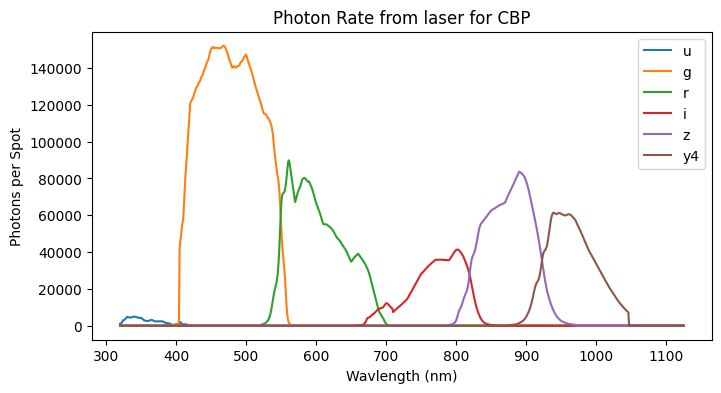

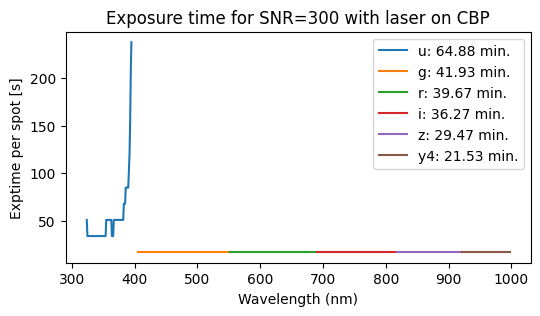

In [5]:
print(f'Results for pinhole: {ETC.pinhole_size * 10e5} um')
ETC.get_total_exptime()
ETC.plot_photon_rate()
ETC.plot_exptime()

Results for pinhole: 50.0 um


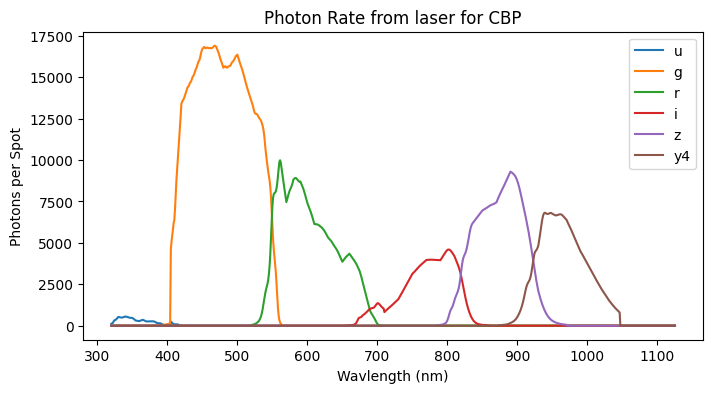

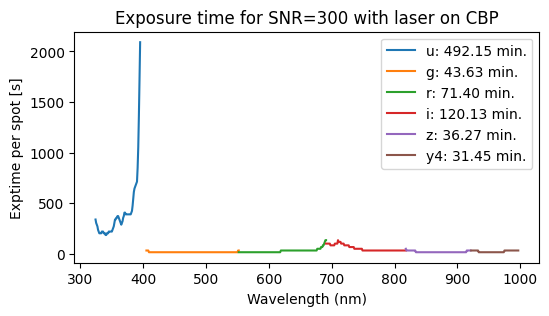

In [6]:
ETC.pinhole_size = 0.00005
print(f'Results for pinhole: {ETC.pinhole_size * 10e5} um')
ETC.get_total_exptime()
ETC.plot_photon_rate()
ETC.plot_exptime()

Results for pinhole: 150.0 um


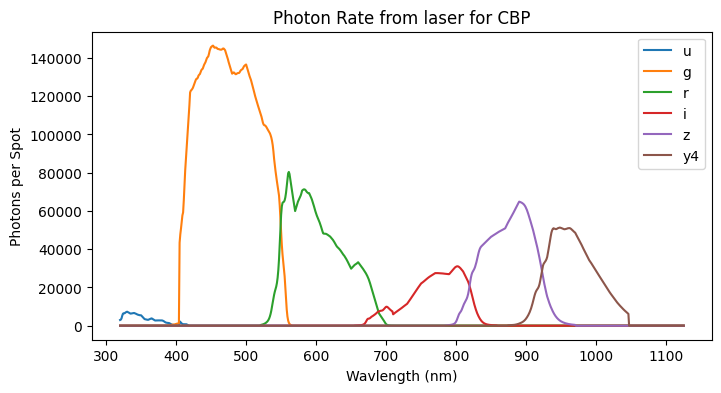

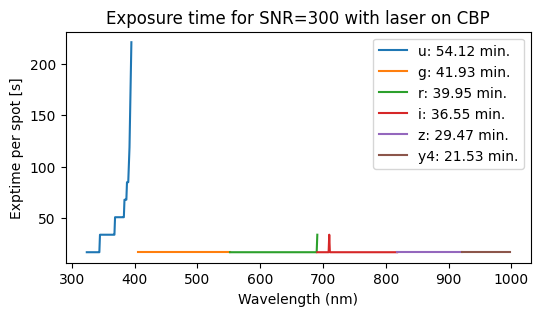

In [7]:
ETC.pinhole_size = 0.00015
ETC.m1 = 'Al-Ideal'
ETC.m2 = 'Al-Ideal'
ETC.m3 = 'Al-Ideal'
print(f'Results for pinhole: {ETC.pinhole_size * 10e5} um')
ETC.get_total_exptime()
ETC.plot_photon_rate()
ETC.plot_exptime()